In [35]:
import pandas as pd

df = pd.read_csv('crypto_prices_2018_2025_.csv', header=0)
print(df.head())


       Date   Crypto      Open      High       Low     Close          Volume
0  1/1/2018  Bitcoin 14112.200 14112.200 13154.700 13657.200 10291200000.000
1  1/2/2018  Bitcoin 13625.000 15444.600 13163.600 14982.100 16846600192.000
2  1/3/2018  Bitcoin 14978.200 15572.800 14844.500 15201.000 16871900160.000
3  1/4/2018  Bitcoin 15270.700 15739.700 14522.200 15599.200 21783199744.000
4  1/5/2018  Bitcoin 15477.200 17705.199 15202.800 17429.500 23840899072.000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13385 entries, 0 to 13384
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    13385 non-null  object 
 1   Crypto  13385 non-null  object 
 2   Open    13385 non-null  float64
 3   High    13385 non-null  float64
 4   Low     13385 non-null  float64
 5   Close   13385 non-null  float64
 6   Volume  13385 non-null  float64
dtypes: float64(5), object(2)
memory usage: 732.1+ KB


In [37]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

In [38]:
df.head()

,Date,Crypto,Open,High,Low,Close,Volume
0,2018-01-01,Bitcoin,14112.200,14112.200,13154.700,13657.200,10291200000.000
1,2018-01-02,Bitcoin,13625.000,15444.600,13163.600,14982.100,16846600192.000
2,2018-01-03,Bitcoin,14978.200,15572.800,14844.500,15201.000,16871900160.000
3,2018-01-04,Bitcoin,15270.700,15739.700,14522.200,15599.200,21783199744.000
4,2018-01-05,Bitcoin,15477.200,17705.199,15202.800,17429.500,23840899072.000


In [39]:
print(df.isnull().sum())

Date      0
Crypto    0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [40]:
df = df.round(3)

In [41]:
print(df.head())

        Date   Crypto      Open      High       Low     Close          Volume
0 2018-01-01  Bitcoin 14112.200 14112.200 13154.700 13657.200 10291200000.000
1 2018-01-02  Bitcoin 13625.000 15444.600 13163.600 14982.100 16846600192.000
2 2018-01-03  Bitcoin 14978.200 15572.800 14844.500 15201.000 16871900160.000
3 2018-01-04  Bitcoin 15270.700 15739.700 14522.200 15599.200 21783199744.000
4 2018-01-05  Bitcoin 15477.200 17705.199 15202.800 17429.500 23840899072.000


In [42]:
# Disable scientific notation for display
pd.set_option('display.float_format', lambda x: f'{x:.3f}')

In [43]:
df.head()

,Date,Crypto,Open,High,Low,Close,Volume
0,2018-01-01,Bitcoin,14112.200,14112.200,13154.700,13657.200,10291200000.000
1,2018-01-02,Bitcoin,13625.000,15444.600,13163.600,14982.100,16846600192.000
2,2018-01-03,Bitcoin,14978.200,15572.800,14844.500,15201.000,16871900160.000
3,2018-01-04,Bitcoin,15270.700,15739.700,14522.200,15599.200,21783199744.000
4,2018-01-05,Bitcoin,15477.200,17705.199,15202.800,17429.500,23840899072.000


In [44]:
df.describe()

,Date,Open,High,Low,Close,Volume
count,13385,13385.000,13385.000,13385.000,13385.000,13385.000
mean,2021-08-31 00:00:00,6540.286,6684.481,6387.763,6546.034,9253108723.754
min,2018-01-01 00:00:00,0.002,0.002,0.001,0.002,9284.000
25%,2019-11-01 00:00:00,0.343,0.354,0.330,0.342,572231452.000
50%,2021-08-31 00:00:00,149.352,154.102,145.459,149.554,2140526232.000
75%,2023-07-01 00:00:00,2489.848,2552.803,2409.924,2489.499,13139456229.000
max,2025-04-30 00:00:00,106147.297,109114.883,105291.734,106146.266,350968000000.000
std,NaN,16660.103,17016.179,16286.658,16676.221,14680146446.840


In [45]:
#saving cleaned data
df.to_csv('cleaned_crypto_data.csv', index=False)


print("File saved as 'cleaned_crypto_data.csv'")

File saved as 'cleaned_crypto_data.csv'


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
cryptos = df['Crypto'].unique()
print(cryptos)

['Bitcoin' 'Ethereum' 'Binance Coin' 'Dogecoin' 'XRP']


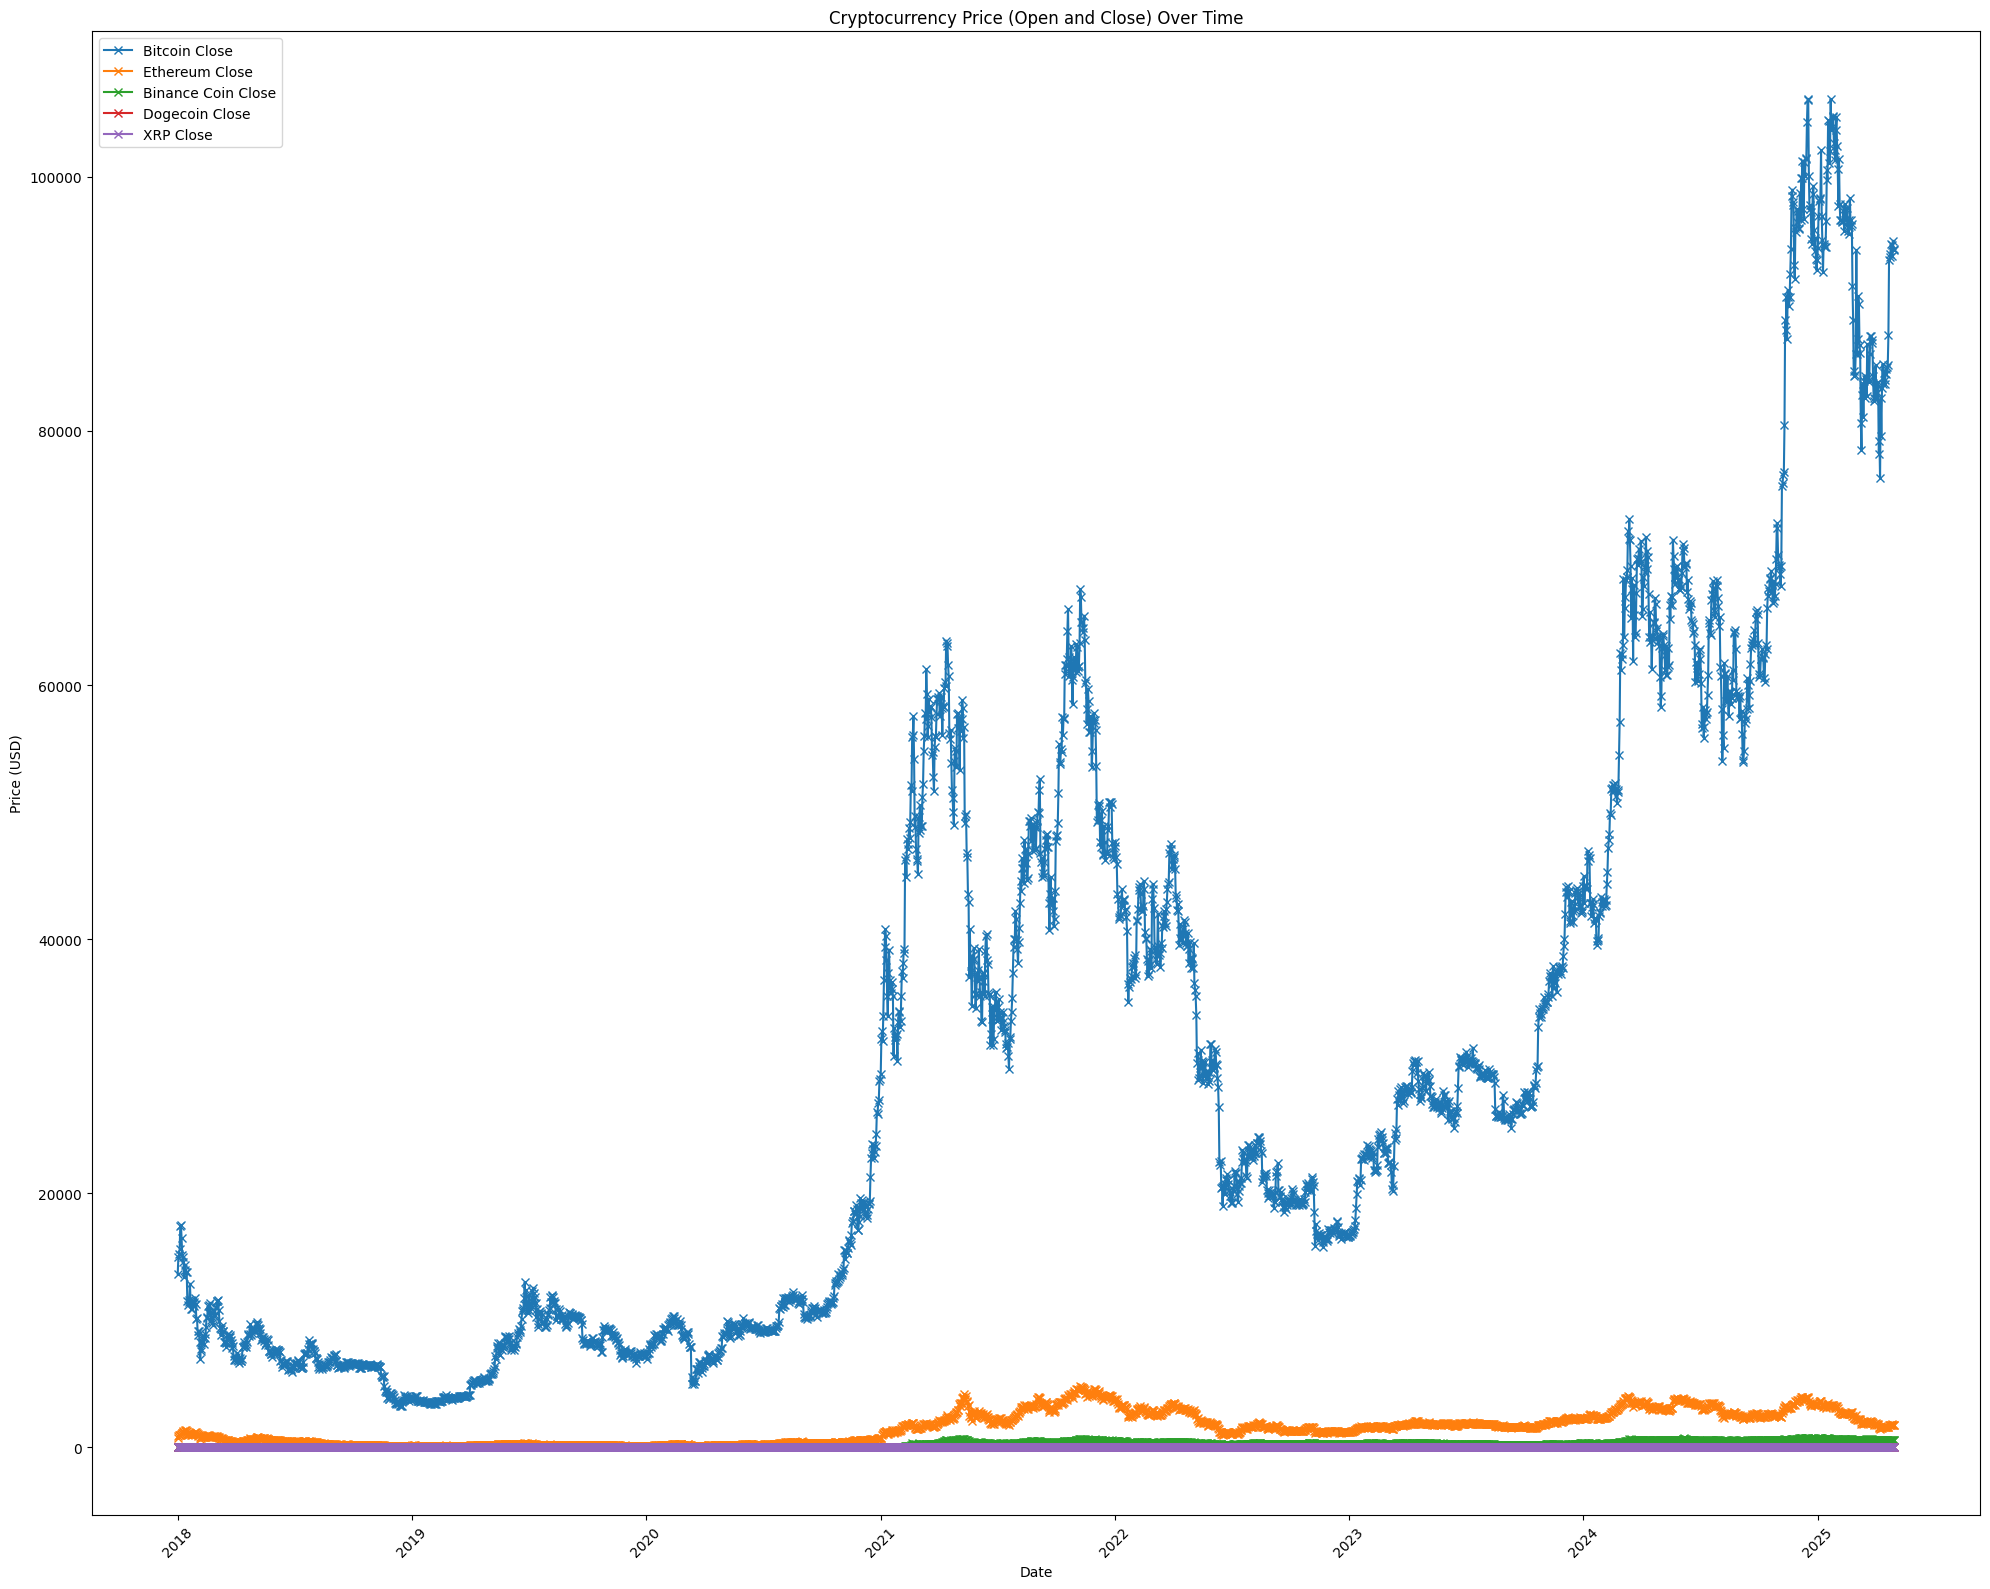

In [49]:
# Set the figure size for the combined plot
plt.figure(figsize=(20, 16))

# Plot combined data for all cryptos
for crypto in cryptos:
    crypto_data = df[df['Crypto'] == crypto]
    
    # Plot Open and Close prices for each crypto
    #plt.plot(crypto_data['Date'], crypto_data['Open'], label=f'{crypto} Open', linestyle='-', marker='o')
    plt.plot(crypto_data['Date'], crypto_data['Close'], label=f'{crypto} Close', linestyle='-', marker='x')

# Add titles, labels, and legend
plt.title('Cryptocurrency Price (Open and Close) Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(loc='best')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()